moedl analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.models import load_model
model=load_model('/content/drive/My Drive/database_folder/car_theft/models/top_layers.iv3.hdf5')

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

test_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

test_flow=test_generator.flow_from_directory(
    '/content/drive/My Drive/database_folder/car_theft/test',
    shuffle=False,
    target_size=(299,299),
    batch_size=32
)



Found 1196 images belonging to 10 classes.


In [0]:
#we are using predict generator in our test data set genrator

import math
import numpy as np

predictions=model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))

predicted_classes=np.argmax(predictions,axis=1)



In [0]:
true_classes=test_flow.classes
class_labels=list(test_flow.class_indices.keys())

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
!pip install scikit-plot

In [0]:
import scikitplot as skplt

0 : chevrolet_impala_2008
1 : chevrolet_silverado_2004
2 : dodge_ram_2001
3 : ford_f150_2006
4 : gmc_sierra_2012
5 : honda_accord_1997
6 : honda_civic_1998
7 : nissan_altima_2014
8 : toyota_camry_2014
9 : toyota_corolla_2013


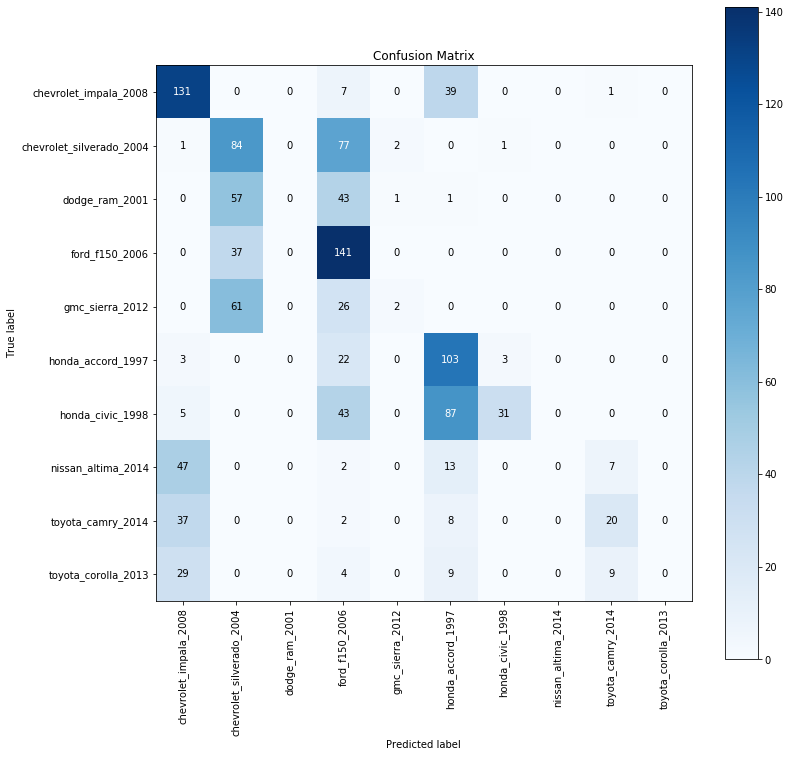

In [32]:
[print(k,':',v) for k,v in enumerate(class_labels)]
true_map_classes=[class_labels[x] for x in true_classes]
predicted_map_classes=[class_labels[x] for x in predicted_classes]

letsee=skplt.metrics.plot_confusion_matrix(
    true_map_classes,
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(12,12)
)

f1 -score/precision/recall

In [37]:
from sklearn.metrics import classification_report
report=classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print(report)

                          precision    recall  f1-score   support

   chevrolet_impala_2008       0.52      0.74      0.61       178
chevrolet_silverado_2004       0.35      0.51      0.42       165
          dodge_ram_2001       0.00      0.00      0.00       102
          ford_f150_2006       0.38      0.79      0.52       178
         gmc_sierra_2012       0.40      0.02      0.04        89
       honda_accord_1997       0.40      0.79      0.53       131
        honda_civic_1998       0.89      0.19      0.31       166
      nissan_altima_2014       0.00      0.00      0.00        69
       toyota_camry_2014       0.54      0.30      0.38        67
     toyota_corolla_2013       0.00      0.00      0.00        51

                accuracy                           0.43      1196
               macro avg       0.35      0.33      0.28      1196
            weighted avg       0.41      0.43      0.35      1196



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


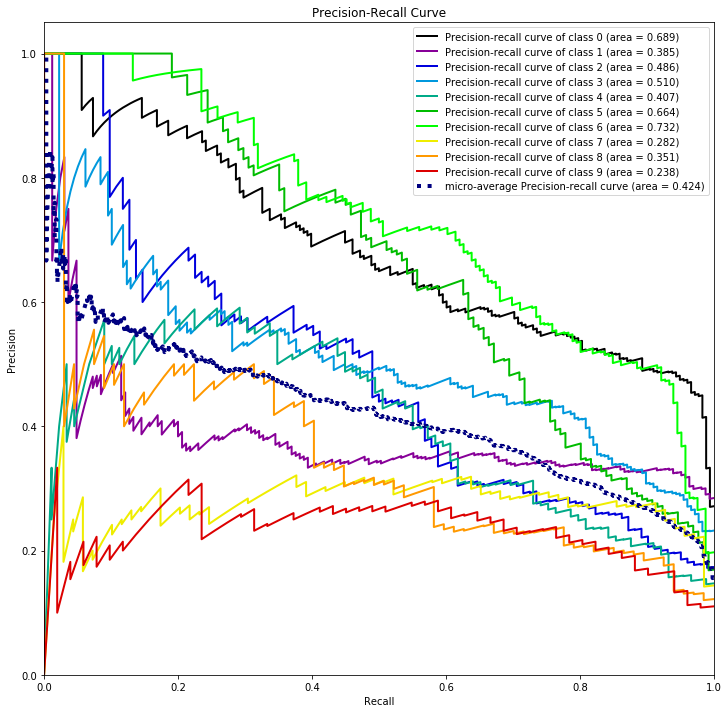

In [41]:
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12)
)